# **1. 규제 선형 회귀 모델/ 회귀 트리**
릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 입력하면 ‘껍질의 고리수’를 예측한 뒤 예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이가 됩니다.

In [1]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [2]:
# 데이터 로드
data = pd.read_csv("./abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [3]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [4]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [5]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [6]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha = 0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
pred = ridge.predict(X_test)

#MSE와 RMSE구하기
mse = mean_squared_error(y_test, pred)
rmse  = np.sqrt(mse)
print(mse)
print(rmse)

4.928389255237459
2.2199975800071177


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요. 

In [7]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [8]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt( - 1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0}, RMSE 평균 {1}'. format(alpha, avg_rmse))

alpha 0, RMSE 평균 2.202543697146299
alpha 0.1, RMSE 평균 2.199241910314151
alpha 1, RMSE 평균 2.203880859540857
alpha 10, RMSE 평균 2.348421772319724
alpha 100, RMSE 평균 2.6135828843153095


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [9]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [10]:
#모델 생성 및 훈련
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

#예측값 구하기
pred = xgb.predict(X_test)

#MSE와 RMSE 구하기
mse = mean_squared_error(y_test, pred)
rmse  = np.sqrt(mse)
print(mse)
print(rmse)


5.3761599257796195
2.3186547664065085


<AxesSubplot:>

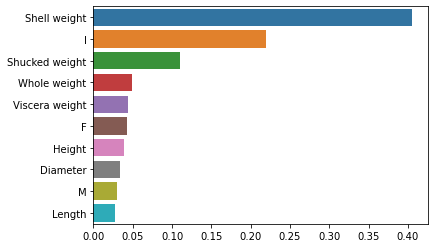

In [11]:
# 피처 중요도 시각화
import seaborn as sns
%matplotlib inline

feature_series = pd.Series(data = xgb.feature_importances_, index = data.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요. 

In [12]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# 1) 데이터 불러오기 및 변수 선택

In [13]:
wine = load_wine()

wine_x = wine.data # x변수 
wine_y = wine.target # y변수

# 2) train/test 셋 분리

In [14]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape 
y_train.shape 

(124,)

# 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [15]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [16]:
#기울기
lr.coef_

array([[-1.99751228e-01,  3.65450762e-01,  1.49472198e-01,
        -1.88027165e-01, -2.28495272e-02,  1.95456591e-01,
         4.66701515e-01, -1.66796737e-02,  8.23897563e-02,
         6.75012062e-02, -1.92621933e-02,  2.94915909e-01,
         7.42523445e-03],
       [ 5.96476075e-01, -7.88673059e-01, -1.26181508e-01,
         2.12254574e-01, -1.13504547e-02,  3.15786083e-01,
         3.55148170e-01,  3.34675707e-02,  2.79035816e-01,
        -1.17202541e+00,  2.61165815e-01,  4.64731790e-01,
        -8.33633375e-03],
       [-3.96724847e-01,  4.23222297e-01, -2.32906894e-02,
        -2.42274094e-02,  3.41999818e-02, -5.11242674e-01,
        -8.21849685e-01, -1.67878970e-02, -3.61425573e-01,
         1.10452420e+00, -2.41903621e-01, -7.59647699e-01,
         9.11099300e-04]])

In [17]:
#절편
lr.intercept_

array([-0.04177839,  0.0955105 , -0.05373211])

3-3) 모델의 정확도를 구하세요.

In [18]:
#모델의 예측값 구하기
pred = lr.predict(x_test)

#모델의 정확도 구하기
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)


0.9629629629629629